<a href="https://colab.research.google.com/github/spdsp04/Telecom_Churn_Prediction_Group_Case_Study/blob/main/Telecom_Chrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
# Telecom Chrun Group Case Study

# Telecom Churn Prediction Group Case Study

## Business problem

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist, your task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.

So we need to analyse telecom industry data and predict high value customers who are at high risk of churn and identify main indicators of churn

In [140]:
# Supress Warnings

import warnings
warnings.filterwarnings(action="ignore")

In [141]:
# import required Libraries

import pandas as pd # improt pandas
pd.set_option("display.max_columns",None) # for max columns
pd.set_option("display.max_rows",None) # for max rows

import datetime as dt # for date and time

import numpy as np # import numpy

import matplotlib.pyplot as plt # import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec 

import seaborn as sns # import seaborn
sns.set(style="ticks")
%matplotlib inline

from scipy.stats import norm 
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm

In [142]:
# Checking versions of Libraries
f'NumPy version: {np.__version__} | Pandas version: {pd.__version__} | Seaborn version: {sns.__version__}'

'NumPy version: 1.21.5 | Pandas version: 1.3.5 | Seaborn version: 0.11.2'

### Importing Datasets

In [143]:
train_url = 'https://raw.githubusercontent.com/spdsp04/Telecom_Churn_Prediction_Group_Case_Study/main/train.csv'
chrun_train = pd.read_csv(train_url, encoding = 'unicode_escape')
chrun_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,31.28,87.01,7.53,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,65.09,204.99,1.01,0.00,0.00,0.00,8.20,0.63,0.00,0.38,0.00,0.00,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.00,0.00,0.00,7.46,27.58,15.18,11.84,53.04,40.56,0.00,0.00,0.66,0.00,0.00,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,0.00,122.79,42.95,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.73,31.66,0.00,0.00,0.00,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.44,39.44,25.04,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,

In [144]:
test_url = 'https://raw.githubusercontent.com/spdsp04/Telecom_Churn_Prediction_Group_Case_Study/main/test.csv'
chrun_test = pd.read_csv(test_url, encoding = 'unicode_escape')
chrun_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,91.88,65.33,64.44,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.00,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.00,0.00,0.00,0.00,0.00,0.00,48.93,7.68,28.48,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.00,0.00,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,414.17,515.57,360.87,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.76,17.68,0.00,0.00,0.80,0.00,0.00,0.00,0.00,0.00,0.00,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.00,0.00,0.00,5,4,5,500,500,500,250,250,250,6/

In [145]:
# checking size of dataset
print(chrun_train.shape)
print(chrun_test.shape)

(69999, 172)
(30000, 171)


### Meaning of word Churn here what we assume

User who have not done any utilization, either approaching or active - as far as calls, web and so on throughout some undefined time frame. In our investigation we are focusing on high worth users, as around 80% of income comes from the top 20% users. Accordingly, in the event that we can decrease agitate of the great worth users, we will actually want to lessen huge income spillage.

Our dataset is partitioned into 3 stages:
Great stage wherein the client is content with the assistance
Activity pase wherein the user was not content with administration or got a superior proposal from contender and so forth. In this stage, the user for the most part shows unexpected way of behaving in comparison to the great stage. Likewise, it is pivotal to distinguish high-agitate risk user in this stage, so a few remedial moves can be made now to prevet stir
Stir stage wherein the user would have agitated

High-esteem users are the people who have re-energized with a sum more than or equivalent to X, where X is the 70th percentile of the normal re-energize sum in the initial two months (the great stage).
In the wake of distinguishing high worth users, we will label beat users in view of the individuals who have not settled on any decisions (either approaching or cordial) and have not utilized portable web even once in the agitate stage.

How about we initially distinguish high-esteem users

In [146]:
chrun_train['total_data_rech_6'] = chrun_train['total_rech_data_6'] * chrun_train['av_rech_amt_data_6']
chrun_train['total_data_rech_7'] = chrun_train['total_rech_data_7'] * chrun_train['av_rech_amt_data_7']

chrun_train['amt_data_6'] = chrun_train[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
chrun_train['amt_data_7'] = chrun_train[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)

chrun_train['AVG_amt_data_6_7'] = chrun_train[['amt_data_6','amt_data_7']].mean(axis=1)

chrun_train[['total_rech_amt_6','total_rech_amt_7','AVG_amt_data_6_7']].quantile(np.linspace(.1, 1, 9, 0))

,total_rech_amt_6,total_rech_amt_7,AVG_amt_data_6_7
0.10,0.00,0.00,60.00
0.20,80.00,65.00,108.50
0.30,120.00,110.00,155.00
0.40,170.00,160.00,210.00
0.50,229.00,220.00,275.50
0.60,290.00,284.00,361.00
0.70,378.00,370.00,477.50
0.80,504.00,500.00,656.00
0.90,735.00,730.00,1029.00


In [147]:
chrun_test['total_data_rech_6'] = chrun_test['total_rech_data_6'] * chrun_test['av_rech_amt_data_6']
chrun_test['total_data_rech_7'] = chrun_test['total_rech_data_7'] * chrun_test['av_rech_amt_data_7']

chrun_test['amt_data_6'] = chrun_test[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
chrun_test['amt_data_7'] = chrun_test[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)

chrun_test['AVG_amt_data_6_7'] = chrun_test[['amt_data_6','amt_data_7']].mean(axis=1)

chrun_test[['total_rech_amt_6','total_rech_amt_7','AVG_amt_data_6_7']].quantile(np.linspace(.1, 1, 9, 0))

,total_rech_amt_6,total_rech_amt_7,AVG_amt_data_6_7
0.10,0.00,0.00,60.00
0.20,77.00,66.00,108.00
0.30,120.00,115.00,154.00
0.40,170.00,160.00,208.00
0.50,230.00,220.00,275.00
0.60,290.00,282.00,356.00
0.70,380.00,368.00,478.00
0.80,504.00,500.00,658.10
0.90,728.00,734.00,1025.50


According to the meaning of high worth users are those whose re-energize sum ought to be more than or equivalent to 70th percentile.

Be that as it may, assuming we utilize more prominent than or equivalent to, we wind up getting a little above 30K records as against to 29.9K records.
Thus, in the event that we conisder just more prominent than, we get 29.9K records.
Accordingly we have considered more noteworthy than to channel high worth users

In [148]:
high_end_users_train = chrun_train[(chrun_train['AVG_amt_data_6_7']> chrun_train['AVG_amt_data_6_7'].quantile(0.7))]
high_end_users_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20998 entries, 4 to 69997
Columns: 177 entries, id to AVG_amt_data_6_7
dtypes: float64(140), int64(28), object(9)
memory usage: 28.5+ MB


In [149]:
high_end_users_test = chrun_test[(chrun_test['AVG_amt_data_6_7']> chrun_test['AVG_amt_data_6_7'].quantile(0.7))]
high_end_users_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8983 entries, 1 to 29999
Columns: 176 entries, id to AVG_amt_data_6_7
dtypes: float64(140), int64(27), object(9)
memory usage: 12.1+ MB


### About Chrun Users


Based on last month identify users about to chrun

In [150]:
chrun_train['about_to_chrun_alert'] = np.where(
                            ((chrun_train['total_ic_mou_8'] == 0.00) | (chrun_train['total_og_mou_8'] == 0.00))
                            & ((chrun_train['vol_2g_mb_8'] == 0.00) | (chrun_train['vol_3g_mb_8'] == 0.00))
                            , 1, 0
                           )
print(chrun_train['about_to_chrun_alert'].value_counts())
print(chrun_train['about_to_chrun_alert'].value_counts()/chrun_train.shape[0])

0    62694
1     7305
Name: about_to_chrun_alert, dtype: int64
0   0.90
1   0.10
Name: about_to_chrun_alert, dtype: float64


In [151]:
chrun_test['about_to_chrun_alert'] = np.where(
                            ((chrun_test['total_ic_mou_8'] == 0.00) | (chrun_test['total_og_mou_8'] == 0.00))
                            & ((chrun_test['vol_2g_mb_8'] == 0.00) | (chrun_test['vol_3g_mb_8'] == 0.00))
                            , 1, 0
                           )
print(chrun_test['about_to_chrun_alert'].value_counts())
print(chrun_test['about_to_chrun_alert'].value_counts()/chrun_test.shape[0])

0    26789
1     3211
Name: about_to_chrun_alert, dtype: int64
0   0.89
1   0.11
Name: about_to_chrun_alert, dtype: float64


### Remove all features with chrun track of last month

In [152]:
chrun_train = chrun_train.drop(chrun_train.filter(regex='_8|aug', axis = 1).columns, axis=1)
chrun_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 123 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    arpu_6                    69999 non-null  float64
 8    arpu_7                    69999 non-null  float64
 9    onnet_mou_6               67231 non-null  float64
 10   onnet_mou_7               67312 non-null  float64
 11   offnet_mou_6              67231 non-null  float64
 12   offnet_mou_7              67312 non-null  float64
 13   roam_ic_mou_6             67231 non-null  fl

In [153]:
chrun_test = chrun_test.drop(chrun_test.filter(regex='_8|aug', axis = 1).columns, axis=1)
chrun_test.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 122 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        30000 non-null  int64  
 1    circle_id                 30000 non-null  int64  
 2    loc_og_t2o_mou            29684 non-null  float64
 3    std_og_t2o_mou            29684 non-null  float64
 4    loc_ic_t2o_mou            29684 non-null  float64
 5    last_date_of_month_6      30000 non-null  object 
 6    last_date_of_month_7      29798 non-null  object 
 7    arpu_6                    30000 non-null  float64
 8    arpu_7                    30000 non-null  float64
 9    onnet_mou_6               28831 non-null  float64
 10   onnet_mou_7               28828 non-null  float64
 11   offnet_mou_6              28831 non-null  float64
 12   offnet_mou_7              28828 non-null  float64
 13   roam_ic_mou_6             28831 non-null  fl

In [154]:
columns_with_only_one_value = pd.DataFrame(chrun_train.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(columns_with_only_one_value[columns_with_only_one_value['nunique'] == 1])
# droping columns with only one value throughtout the columns
chrun_train = chrun_train.drop(columns = list(columns_with_only_one_value[columns_with_only_one_value['nunique'] == 1]['feature']))

                 feature  nunique
1              circle_id        1
2         loc_og_t2o_mou        1
3         std_og_t2o_mou        1
4         loc_ic_t2o_mou        1
5   last_date_of_month_6        1
6   last_date_of_month_7        1
33      std_og_t2c_mou_6        1
34      std_og_t2c_mou_7        1
59      std_ic_t2o_mou_6        1
60      std_ic_t2o_mou_7        1


In [155]:
columns_with_only_one_value = pd.DataFrame(chrun_test.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(columns_with_only_one_value[columns_with_only_one_value['nunique'] == 1])
# droping columns with only one value throughtout the columns
chrun_test = chrun_test.drop(columns = list(columns_with_only_one_value[columns_with_only_one_value['nunique'] == 1]['feature']))

                 feature  nunique
1              circle_id        1
2         loc_og_t2o_mou        1
3         std_og_t2o_mou        1
4         loc_ic_t2o_mou        1
5   last_date_of_month_6        1
6   last_date_of_month_7        1
33      std_og_t2c_mou_6        1
34      std_og_t2c_mou_7        1
59      std_ic_t2o_mou_6        1
60      std_ic_t2o_mou_7        1


### Imputation

In [156]:
# Let's have a look at missing values - how many are there & also get their percencentages
pd.options.display.float_format = '{:.2f}'.format
missing_values_train = pd.DataFrame((chrun_train.isnull().sum()/len(chrun_train))*100).reset_index().rename(columns = {'index': 'column_name', 0: '%age_of_Missing_values'}).sort_values('%age_of_Missing_values',ascending = False)
missing_values_test = pd.DataFrame((chrun_test.isnull().sum()/len(chrun_test))*100).reset_index().rename(columns = {'index': 'column_name', 0: '%age_of_Missing_values'}).sort_values('%age_of_Missing_values',ascending = False)
missing_values_train.transpose()


,75,101,77,81,73,87,79,71,89,107,91,72,102,74,76,108,78,92,88,82,80,90,37,39,59,41,43,17,57,5,55,47,49,3,45,7,19,33,9,31,11,29,27,25,13,23,15,21,51,60,58,52,56,50,18,48,28,26,24,22,20,16,34,14,12,10,8,6,4,32,30,40,38,44,42,46,68,67,110,95,111,93,106,94,96,109,97,99,100,105,104,103,98,0,86,62,2,35,36,53,54,1,61,63,85,64,65,66,69,70,83,84,112
column_name,max_rech_data_6,fb_user_6,count_rech_2g_6,av_rech_amt_data_6,total_rech_data_6,arpu_3g_6,count_rech_3g_6,date_of_last_rech_data_6,arpu_2g_6,total_data_rech_6,night_pck_user_6,date_of_last_rech_data_7,fb_user_7,total_rech_data_7,max_rech_data_7,total_data_rech_7,count_rech_2g_7,night_pck_user_7,arpu_3g_7,av_rech_amt_data_7,count_rech_3g_7,arpu_2g_7,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,ic_others_6,loc_ic_t2f_mou_6,loc_ic_mou_6,loc_og_t2c_mou_6,isd_ic_mou_6,offnet_mou_6,spl_ic_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,onnet_mou_6,std_ic_t2t_mou_6,roam_ic_mou_6,loc_og_mou_6,og_others_6,roam_og_mou_6,spl_og_mou_6,loc_og_t2t_mou_6,isd_og_mou_6,std_og_mou_6,std_og_t2f_mou_6,loc_og_t2m_mou_6,std_og_t2m_mou_6,loc_og_t2f_mou_6,std_og_t2t_mou_6,std_ic_mou_6,ic_others_7,isd_ic_mou_7,std_ic_mou_7,spl_ic_mou_7,std_ic_t2f_mou_7,loc_og_t2c_mou_7,std_ic_t2m_mou_7,std_og_mou_7,std_og_t2f_mou_7,std_og_t2m_mou_7,std_og_t2t_mou_7,loc_og_mou_7,loc_og_t2f_mou_7,og_others_7,loc_og_t2m_mou_7,loc_og_t2t_mou_7,roam_og_mou_7,roam_ic_mou_7,offnet_mou_7,onnet_mou_7,spl_og_mou_7,isd_og_mou_7,loc_ic_t2m_mou_7,loc_ic_t2t_mou_7,loc_ic_mou_7,loc_ic_t2f_mou_7,std_ic_t2t_mou_7,date_of_last_rech_7,date_of_last_rech_6,amt_data_7,sachet_2g_6,AVG_amt_data_6_7,monthly_2g_6,churn_probability,monthly_2g_7,sachet_2g_7,amt_data_6,monthly_3g_6,sachet_3g_6,sachet_3g_7,jun_vbc_3g,jul_vbc_3g,aon,monthly_3g_7,id,vol_3g_mb_7,total_rech_num_7,arpu_7,total_og_mou_6,total_og_mou_7,total_ic_mou_6,total_ic_mou_7,arpu_6,total_rech_num_6,total_rech_amt_6,vol_3g_mb_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,about_to_chrun_alert
%age_of_Missing_values,74.90,74.90,74.90,74.90,74.90,74.90,74.90,74.90,74.90,74.90,74.90,74.48,74.48,74.48,74.48,74.48,74.48,74.48,74.48,74.48,74.48,74.48,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.95,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,1.76,1.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [157]:
missing_values_test.transpose()

,91,73,89,87,106,81,79,101,77,71,75,92,107,102,72,74,80,90,82,88,78,76,60,58,34,52,50,48,44,42,40,38,56,46,10,32,18,22,24,16,14,26,28,12,8,30,6,4,20,9,11,59,13,15,7,17,5,19,3,33,21,51,37,31,39,41,29,43,45,47,49,25,27,23,57,55,68,67,95,110,109,108,93,94,105,96,97,100,99,104,98,103,0,86,62,2,35,36,53,54,1,61,63,85,64,65,66,69,70,83,84,111
column_name,night_pck_user_6,total_rech_data_6,arpu_2g_6,arpu_3g_6,total_data_rech_6,av_rech_amt_data_6,count_rech_3g_6,fb_user_6,count_rech_2g_6,date_of_last_rech_data_6,max_rech_data_6,night_pck_user_7,total_data_rech_7,fb_user_7,date_of_last_rech_data_7,total_rech_data_7,count_rech_3g_7,arpu_2g_7,av_rech_amt_data_7,arpu_3g_7,count_rech_2g_7,max_rech_data_7,ic_others_7,isd_ic_mou_7,og_others_7,std_ic_mou_7,std_ic_t2f_mou_7,std_ic_t2m_mou_7,loc_ic_mou_7,loc_ic_t2f_mou_7,loc_ic_t2m_mou_7,loc_ic_t2t_mou_7,spl_ic_mou_7,std_ic_t2t_mou_7,roam_og_mou_7,spl_og_mou_7,loc_og_t2c_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2m_mou_7,std_og_t2f_mou_7,std_og_mou_7,loc_og_t2t_mou_7,roam_ic_mou_7,isd_og_mou_7,offnet_mou_7,onnet_mou_7,loc_og_mou_7,roam_og_mou_6,loc_og_t2t_mou_6,ic_others_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,roam_ic_mou_6,loc_og_t2c_mou_6,offnet_mou_6,loc_og_mou_6,onnet_mou_6,og_others_6,std_og_t2t_mou_6,std_ic_mou_6,loc_ic_t2t_mou_6,spl_og_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,isd_og_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_og_t2f_mou_6,std_og_mou_6,std_og_t2m_mou_6,isd_ic_mou_6,spl_ic_mou_6,date_of_last_rech_7,date_of_last_rech_6,sachet_2g_6,AVG_amt_data_6_7,amt_data_7,amt_data_6,monthly_2g_6,monthly_2g_7,jun_vbc_3g,sachet_2g_7,monthly_3g_6,sachet_3g_7,sachet_3g_6,jul_vbc_3g,monthly_3g_7,aon,id,vol_3g_mb_7,total_rech_num_7,arpu_7,total_og_mou_6,total_og_mou_7,total_ic_mou_6,total_ic_mou_7,arpu_6,total_rech_num_6,total_rech_amt_6,vol_3g_mb_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,about_to_chrun_alert
%age_of_Missing_values,74.72,74.72,74.72,74.72,74.72,74.72,74.72,74.72,74.72,74.72,74.72,74.31,74.31,74.31,74.31,74.31,74.31,74.31,74.31,74.31,74.31,74.31,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.91,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,3.90,1.78,1.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [158]:
#columns_to_impute_zero = ['night_pck_user_6','total_rech_data_6','arpu_2g_6','arpu_3g_6','total_data_rech_6','av_rech_amt_data_6','count_rech_3g_6','fb_user_6','count_rech_2g_6','date_of_last_rech_data_6','max_rech_data_6','night_pck_user_7','total_data_rech_7','fb_user_7','date_of_last_rech_data_7','total_rech_data_7','count_rech_3g_7','arpu_2g_7','av_rech_amt_data_7','arpu_3g_7','count_rech_2g_7','max_rech_data_7']
#for i in columns_to_impute_zero:
#    chrun_train[i].fillna(0,inplace=True)
#columns_to_impute_zero = ['night_pck_user_6','total_rech_data_6','arpu_2g_6','arpu_3g_6','total_data_rech_6','av_rech_amt_data_6','count_rech_3g_6','fb_user_6','count_rech_2g_6','date_of_last_rech_data_6','max_rech_data_6','night_pck_user_7','total_data_rech_7','fb_user_7','date_of_last_rech_data_7','total_rech_data_7','count_rech_3g_7','arpu_2g_7','av_rech_amt_data_7','arpu_3g_7','count_rech_2g_7','max_rech_data_7']
#for i in columns_to_impute_zero:
#    chrun_test[i].fillna(0,inplace=True)
#Dropping all feature with missing values `74% as they do not draw any inferance
columns_to_be_dropped = ['night_pck_user_6','total_rech_data_6','arpu_2g_6','arpu_3g_6','total_data_rech_6','av_rech_amt_data_6','count_rech_3g_6','fb_user_6','count_rech_2g_6','date_of_last_rech_data_6','max_rech_data_6','night_pck_user_7','total_data_rech_7','fb_user_7','date_of_last_rech_data_7','total_rech_data_7','count_rech_3g_7','arpu_2g_7','av_rech_amt_data_7','arpu_3g_7','count_rech_2g_7','max_rech_data_7','date_of_last_rech_7','date_of_last_rech_6']
chrun_train.drop(axis=1,labels=columns_to_be_dropped,inplace=True)
chrun_test.drop(axis=1,labels=columns_to_be_dropped,inplace=True)


In [159]:
print(chrun_train.shape)
print(chrun_test.shape)

(69999, 89)
(30000, 88)


In [160]:
columns_to_be_imputed_with_mode_value = ['loc_og_t2c_mou_7','spl_og_mou_7','loc_ic_mou_7','std_og_t2f_mou_7','std_ic_t2t_mou_7','std_og_t2m_mou_7','isd_og_mou_7','std_og_t2t_mou_7','std_ic_t2m_mou_7','loc_og_mou_7','loc_ic_t2f_mou_7','loc_ic_t2t_mou_7','std_ic_t2f_mou_7','loc_og_t2f_mou_7','loc_og_t2m_mou_7','std_ic_mou_7','loc_og_t2t_mou_7','roam_og_mou_7','spl_ic_mou_7','roam_ic_mou_7','og_others_7','offnet_mou_7','isd_ic_mou_7','onnet_mou_7','loc_ic_t2m_mou_7','ic_others_7','std_og_mou_7','loc_ic_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_mou_6','spl_ic_mou_6','isd_ic_mou_6','ic_others_6','loc_ic_t2m_mou_6','spl_og_mou_6','loc_ic_t2t_mou_6','std_og_t2t_mou_6','onnet_mou_6','offnet_mou_6','roam_ic_mou_6','roam_og_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_mou_6','loc_og_t2c_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6','isd_og_mou_6','og_others_6']
for i in columns_to_be_imputed_with_mode_value:
  chrun_train[i].fillna(chrun_train[i].median(), inplace=True)
  chrun_test[i].fillna(chrun_train[i].median(), inplace=True)

In [161]:
_#to Check null and unique values in parallel
null_unique = pd.DataFrame()
null_unique['nulls'] = pd.Series(chrun_train.isnull().sum())
null_unique['unique'] = pd.Series(chrun_train.nunique())
null_unique.transpose()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,amt_data_6,amt_data_7,AVG_amt_data_6_7,about_to_chrun_alert
nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
unique,69999,61615,61425,20057,20076,26254,26140,5306,4240,6568,5305,11491,11359,17848,17642,3376,3365,1945,2103,22309,22012,14554,14745,16059,16234,2074,1991,21837,22088,1103,1084,3503,3827,914,148,33135,33195,11637,11595,19034,18945,6200,6287,24442,24258,5323,5479,7931,8033,2624,2695,9876,10112,27432,27418,78,103,4421,4640,1523,1658,94,96,2108,2147,190,178,179,166,11494,11443,9768,10296,5,6,30,33,10,13,23,26,3455,10257,9617,2,3419,3604,5453,2


In [162]:
chrun_train['about_to_chrun_alert'].value_counts()

0    62694
1     7305
Name: about_to_chrun_alert, dtype: int64

Text(0.5, 1.0, 'Churn status Distribution')

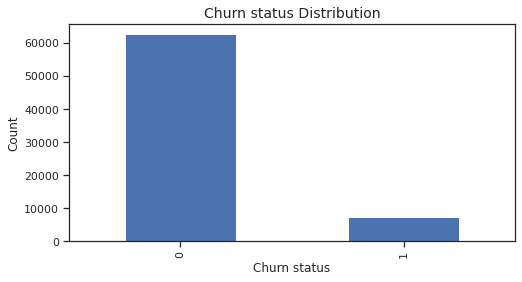

In [164]:
plt.figure(figsize=(8,4))
chrun_train['about_to_chrun_alert'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)

# New Section